In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Path to your dataset
train_dir = 'C:/Users/darap/Downloads/CAT vs DOG/path_to_train_dataset'
validation_dir = 'C:/Users/darap/Downloads/CAT vs DOG/path_to_validation_dataset'

In [3]:
# Data augmentation for training
train_datagen = ImageDataGenerator(rescale=1.0/255.0, 
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [4]:
# Load and preprocess data
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size=(150, 150),
                                                              batch_size=20,
                                                              class_mode='binary')

Found 19998 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [5]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])


c:\Users\darap\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=100,
                    validation_data=validation_generator,
                    validation_steps=50)

c:\Users\darap\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 90s 857ms/step - accuracy: 0.5555 - loss: 2.1191 - val_accuracy: 0.5050 - val_loss: 1.3810
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 73s 731ms/step - accuracy: 0.5594 - loss: 0.8896 - val_accuracy: 0.4930 - val_loss: 0.9839
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 519ms/step - accuracy: 0.6062 - loss: 0.6964

c:\Users\darap\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


100/100 ━━━━━━━━━━━━━━━━━━━━ 63s 635ms/step - accuracy: 0.6062 - loss: 0.6963 - val_accuracy: 0.5260 - val_loss: 0.8241
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 60s 601ms/step - accuracy: 0.5815 - loss: 0.6798 - val_accuracy: 0.5190 - val_loss: 1.2256
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 55s 550ms/step - accuracy: 0.6124 - loss: 0.6839 - val_accuracy: 0.6000 - val_loss: 0.6712
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 50s 499ms/step - accuracy: 0.6100 - loss: 0.6637 - val_accuracy: 0.6340 - val_loss: 0.6481
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 53s 529ms/step - accuracy: 0.6438 - loss: 0.6393 - val_accuracy: 0.5510 - val_loss: 0.7756
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 62s 624ms/step - accuracy: 0.6417 - loss: 0.6335 - val_accuracy: 0.6150 - val_loss: 0.6992
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 64s 639ms/step - accuracy: 0.6909 - loss: 0.5902 - val_accuracy: 0.6470 - val_loss: 0.7247
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 57s 573ms/step - accuracy: 0.6533 - loss: 0.60

In [8]:
# Save the model
model.save('my_model00000.keras')

In [9]:
# Evaluate the model on validation or test data
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step - accuracy: 0.8868 - loss: 0.2609
Validation Loss: 0.266107976436615
Validation Accuracy: 0.8881999850273132


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Prediction: [[0.01352815]]
It's a cat!


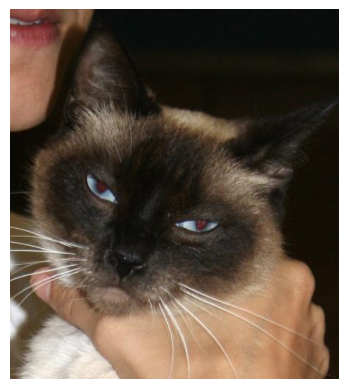

In [12]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image

# Path to the image you want to test
img_path = 'C:/Users/darap/Downloads/CAT vs DOG/test_img.jpg'

# Load and preprocess the image for prediction
img = image.load_img(img_path, target_size=(150, 150))  # Adjust size according to your model
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Rescale the image if you applied rescaling during training

# Predict the class
prediction = model.predict(img_array)
print(f"Prediction: {prediction}")

# If binary classification (cats vs dogs)
if prediction[0] > 0.5:
    print("It's a dog!")
else:
    print("It's a cat!")
    
# Display the image
img_to_display = Image.open(img_path)
plt.imshow(img_to_display)
plt.axis('off')  # Hide the axis
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


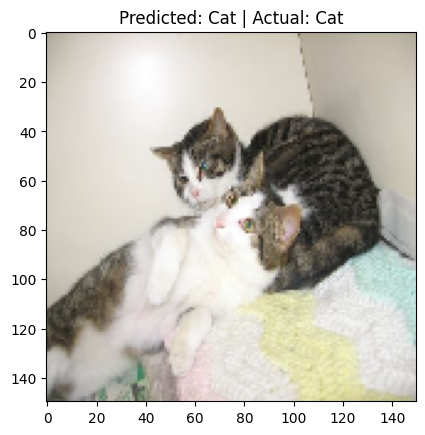

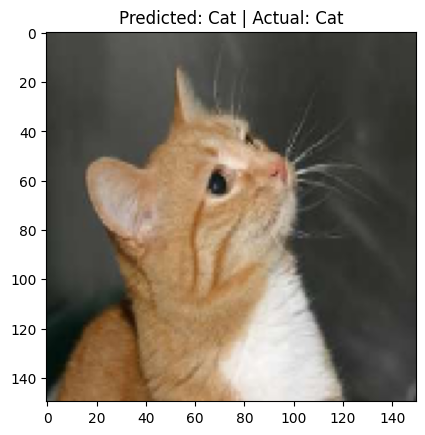

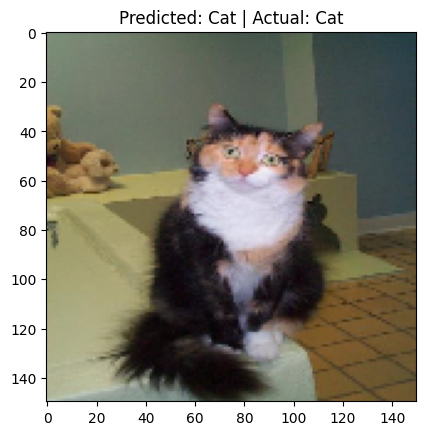

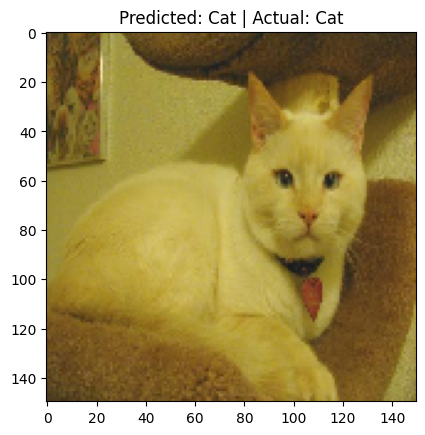

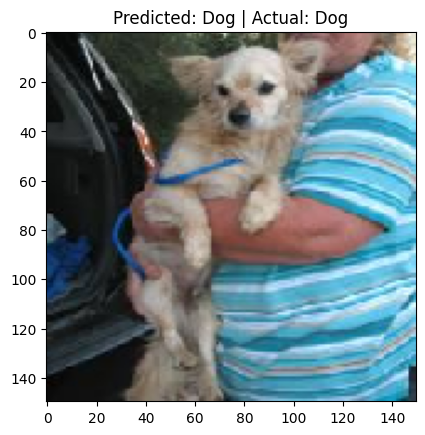

In [14]:
import matplotlib.pyplot as plt

# Load a batch of images from validation generator
x_batch, y_batch = next(validation_generator)

# Make predictions
predictions = model.predict(x_batch)

# Plot images with predicted and actual labels
for i in range(5):  # Show 5 images
    plt.imshow(x_batch[i])
    if predictions[i] > 0.5:
        plt.title(f"Predicted: Dog | Actual: {'Dog' if y_batch[i] == 1 else 'Cat'}")
    else:
        plt.title(f"Predicted: Cat | Actual: {'Dog' if y_batch[i] == 1 else 'Cat'}")
    plt.show()


250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step


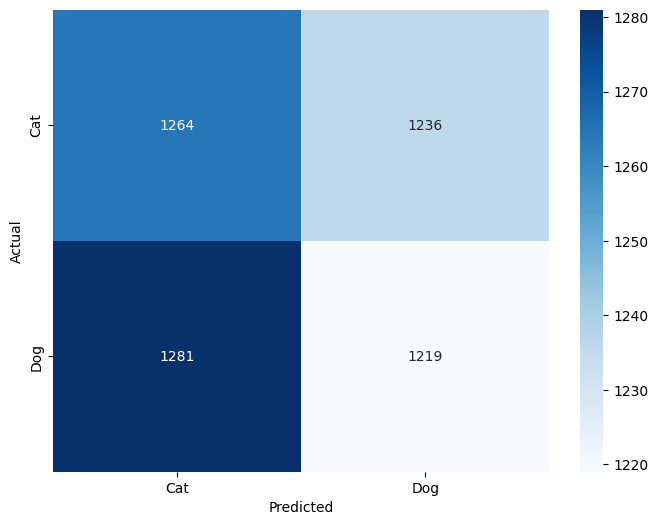

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get true labels and predictions
y_true = validation_generator.classes
y_pred = model.predict(validation_generator)
y_pred = np.round(y_pred).astype(int).reshape(-1)  # Round and reshape predictions for binary classification

# Create a confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()